In [1]:
import shap

In [2]:
import pickle

In [3]:
import os
os.getcwd()

'C:\\Users\\lrubio\\Documents\\git_feci\\ModeloFECI\\pyspark_scripts'

In [46]:
import matplotlib.pyplot as plt

In [6]:
with open("../data/shap_values_h2o.pickle", "rb") as f:
    shap_values = pickle.load(f)
with open("../data/expected_value_h2o.pickle", "rb") as f:
    expected_value = pickle.load(f)

In [7]:
with open("../data/test_driver_h2o.pickle", "rb") as f:
    test_driver = pickle.load(f)

In [4]:
import pandas as pd

In [29]:
shap_values = pd.read_csv("../../../../Downloads/shap_values_h2o.csv", header=None).values

In [30]:
shap_values.shape

(39253, 243)

In [7]:
type(shap_values)

numpy.ndarray

In [27]:
expected_value = pd.read_csv("../../../../Downloads/shap_expected_values_h2o.csv", header=None).min()[0]

In [28]:
expected_value

0.4063518047332764

In [20]:
test_driver = pd.read_csv("../../../../Downloads/shap_test_driver_h2o.csv", header=0)

In [21]:
test_driver.shape

(39253, 243)

In [22]:
test_driver.columns

Index(['inv_cv_tc_months.0', 'inv_cv_tc_months.1', 'inv_cv_tc_months.2',
       'inv_cv_tc_months.3', 'inv_cv_tc_months.4', 'inv_cv_tc_months.5',
       'inv_cv_tc_months.6', 'inv_cv_tc_months.7', 'inv_cv_tc_months.8',
       'inv_cv_tc_months.9',
       ...
       'standstill_notc_month_indexclassVec38',
       'standstill_notc_month_indexclassVec39',
       'standstill_notc_month_indexclassVec40',
       'standstill_notc_month_indexclassVec41',
       'standstill_notc_month_indexclassVec42',
       'standstill_notc_month_indexclassVec43', 'SEXOIndex', 'PF_PJIndex',
       'COD_PROVINCIAIndex', 'DESCR_ESTADOCIVIndex'],
      dtype='object', length=243)

In [36]:
# temporal! (quitar timestamps)
valid_columns = [c for c in range(0, 90)] + [c for c in range(92, 243)]

In [12]:
shap.initjs()

In [31]:
# visualize the first prediction's explanation
shap.force_plot(expected_value, shap_values[0,:], test_driver.iloc[0,:])

In [ ]:
# visualize the training set predictions
shap.force_plot(expected_value, shap_values, test_driver)

shap.force_plot is slow for many thousands of rows, try subsampling your data.


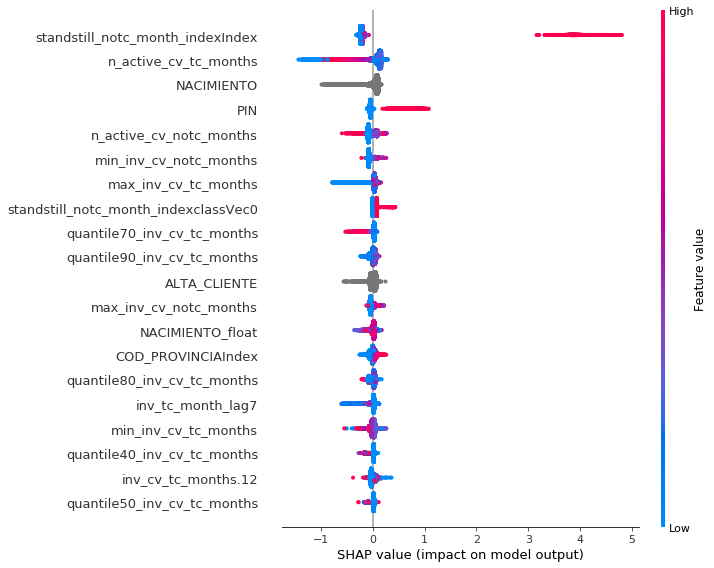

In [33]:
# summarize the effects of all the features
shap.summary_plot(shap_values, test_driver)

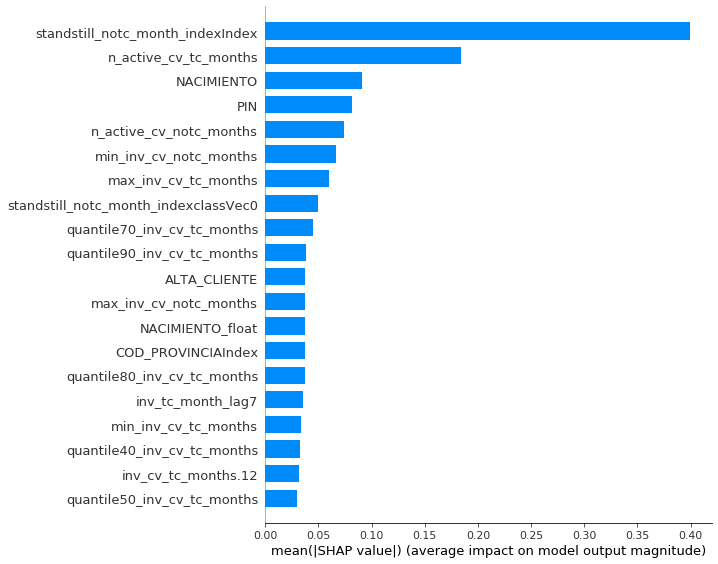

In [38]:
shap.summary_plot(shap_values, test_driver, plot_type="bar")

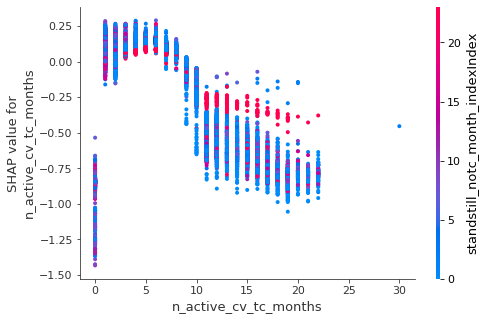

In [37]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("n_active_cv_tc_months", shap_values[:, valid_columns], 
                     test_driver.iloc[:, valid_columns])

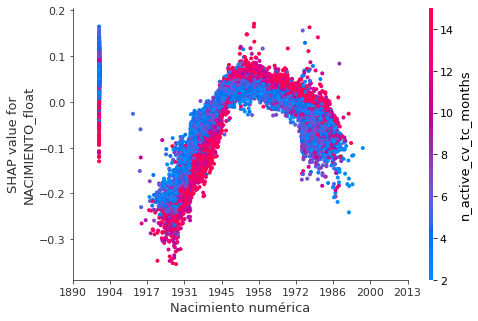

In [62]:
shap.dependence_plot("NACIMIENTO_float", shap_values[:, valid_columns], 
                     test_driver.iloc[:, valid_columns], show=False)
plt.xlabel("Nacimiento numérica")
plt.xticks(plt.xticks()[0], [int(x / 365) for x in plt.xticks()[0]])
plt.show()